In [8]:
#base
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'
cones = Table.read_table(fpath+'cones.csv')
nba=Table.read_table(fpath+'nba_salaries.csv').relabeled(3, 'SALARY')

### About DataScience

Data 획득 -> Data 분석 -> Knowledge(Intelligence) 획득 -> 의사결정(Decision) 활용

Python, R 등 활용 : 매우 편리한 구현

적절한 시각화의 활용 : 분석 결과의 압축

### Casuality and Experiments

인과관계 : 원인과 결과를 규명. ``Data Science`` 의 가장 중요한 목적

상관관계와 비슷하나 다름

1850년대 콜레라와 수도 펌프의 인과관계

커피와 폐암 발병률 사이의 연관성

### ITC

##### Array

array 변수를 수식에 사용 가능하며 벡터 연산으로 효율적이다.

입력 : array, 출력 : single value

``np.prod(), np.sum(), np.all(), np.any(), np.count_zero()``

입력 : array, 출력 : array

``np.diff() (차집합), np.round() (반올림), np.cumprod() (누적 곱)``

``np.exp(), np.log(), np.sqrt(), np.sort()``

입력 : string(문자열 array), 출력 : array

``np.char.lower(), np.char.upper(), np.char.strip(), np.char.isalpha(), np.char.isnumeric()``

입력 : string과 탐색 string, 출력 : array

``np.char.count(), np.char.find(), np.char.rfind(), np.char.startswith()``

##### Range

+ 증가 혹은 감소하는 숫자 배열
+ np.arange() 이용
+ (start, end, step), start는 포함하지만 end는 포함하지 않음

In [9]:
print(np.arange(5))
print(np.arange(3,9))
print(np.arange(1.5,-2,-0.5))

[0 1 2 3 4]
[3 4 5 6 7 8]
[ 1.5  1.   0.5  0.  -0.5 -1.  -1.5]


### Tables

Pandas의 DataFrame과 유사하나 index가 없다.

#### About Table

##### Table 생성

In [10]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


##### Table 출력

In [11]:
cones.show()

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [12]:
cones.show(2)

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75


#### Selection

##### 열 선택

column() or label indexing : numpy array

select() or drop() : Table

In [13]:
cones.select('Flavor')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


In [14]:
cones['Flavor']

array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate',
       'bubblegum'], dtype='<U10')

In [15]:
cones.column('Flavor')

array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate',
       'bubblegum'], dtype='<U10')

In [16]:
cones.drop('Color')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


##### 열 추가

cones.with_columns()

In [17]:
cones.with_columns(
        'Star', [3,4,4,5,3,2],
        'Size', ['L', 'R', 'S', 'L', 'R', 'S']
)

Flavor,Color,Price,Star,Size
strawberry,pink,3.55,3,L
chocolate,light brown,4.75,4,R
chocolate,dark brown,5.25,4,S
strawberry,pink,5.25,5,L
chocolate,dark brown,5.25,3,R
bubblegum,pink,4.75,2,S


##### 행 선택

take() : select by index

where() : select by masking

In [18]:
nba.show(6)

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4


In [19]:
nba.take(1)

PLAYER,POSITION,TEAM,SALARY
Al Horford,C,Atlanta Hawks,12


In [20]:
nba.take(np.arange(3,6))

PLAYER,POSITION,TEAM,SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4


In [21]:
cones.where('Flavor', 'chocolate')

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25


In [22]:
nba.where('SALARY', are.above(10)).sort('SALARY', descending=True) #연봉이 10(백만 불)이 넘는 선수

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


In [23]:
nba.where('PLAYER', are.equal_to('Stephen Curry'))

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


In [24]:
nba.where('SALARY', are.between(10, 10.3)) #10<=연봉<10.3

PLAYER,POSITION,TEAM,SALARY
Luol Deng,SF,Miami Heat,10.1516
Gerald Wallace,SF,Philadelphia 76ers,10.1059
Danny Green,SG,San Antonio Spurs,10
DeMar DeRozan,SG,Toronto Raptors,10.05


##### 행 정렬

cones.sort() 

``descending`` : 내림차순

In [25]:
cones.sort('Price')

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
bubblegum,pink,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25


In [26]:
cones.sort('Flavor', descending=True)

Flavor,Color,Price
strawberry,pink,3.55
strawberry,pink,5.25
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [27]:
nba.sort('SALARY', descending=True).show(5) #연봉 상위 5명

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594


#### Predicate

- x, y : numbers
- s : string
- z : number or string

| Predicate | Description |
|---|---|
|  are.equal_to(z) |   Equal to  z  |  
|   are.above(x) |   Greater than  x  |  
|    are.above_or_equal_to(x) |   Greater than or equal to  x  |  
|   are.below(x) |    Less than  x  |  
|   are.below_or_equal_to(x) |   Less than or equal to  x  |  
|   are.between(x, y) |   Greater than or equal to  x , and less than  y  |  
|   are.strictly_between(x, y) |   Greater than  x  and less than  y  |  
|   are.between_or_equal_to(x, y) |   Greater than or equal to  x , and less than or equal to  y  |  
|   are.containing(s) |   Contains the string  s  | 
| are.not_equal_to(z) | Not equal to z | 
| are.not_above(x) | Not above x |

In [28]:
nba.where('POSITION', are.containing('G'))

PLAYER,POSITION,TEAM,SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452
Jason Richardson,SG,Atlanta Hawks,0.947276
Lamar Patterson,SG,Atlanta Hawks,0.525093
Terran Petteway,SG,Atlanta Hawks,0.525093
Avery Bradley,PG,Boston Celtics,7.73034
Isaiah Thomas,PG,Boston Celtics,6.91287
Marcus Smart,PG,Boston Celtics,3.43104


In [29]:
nba.where('TEAM', are.not_equal_to('Cleveland Cavaliers')).where('SALARY', are.not_below(20))

PLAYER,POSITION,TEAM,SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


### Visualization

In [30]:
actors=Table.read_table(fpath+'actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


#### Scatter Plot

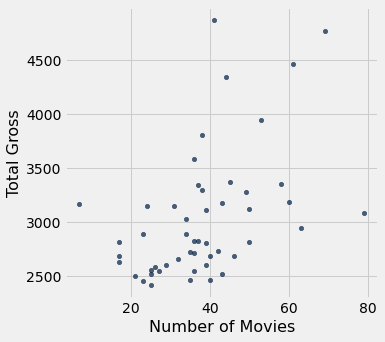

In [31]:
actors.scatter('Number of Movies', 'Total Gross') #출연 편수가 가장 높은 배우들의 Total gross가 최대는 아님

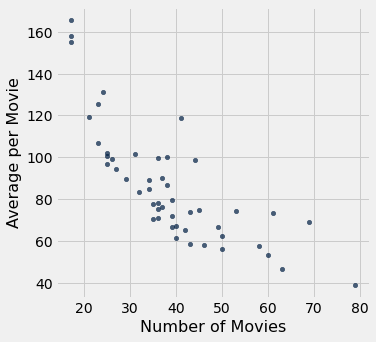

In [32]:
#outlier을 제거한 출연 영화수 대비 평균 total gross
actors.where('Number of Movies', are.above(10)).scatter('Number of Movies', 'Average per Movie')
#출연 영화수가 많아질 수록 편당 매출액이 감소

#### Line Graphs

In [33]:
movies_by_year=Table.read_table(fpath+'movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


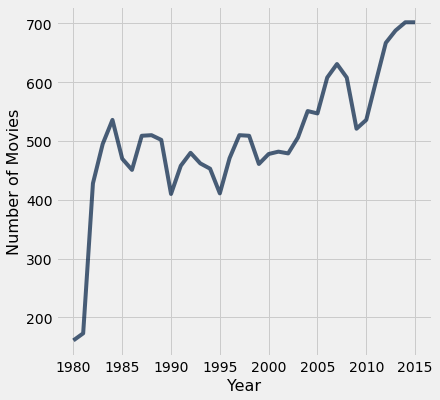

In [34]:
movies_by_year.plot('Year', 'Number of Movies')
#1980년대 초반 급격한 증가

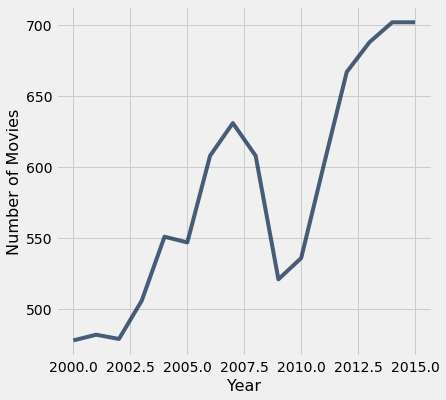

In [35]:
century_21=movies_by_year.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')
#2008년 금융위기로 인한 제작편수의 급감

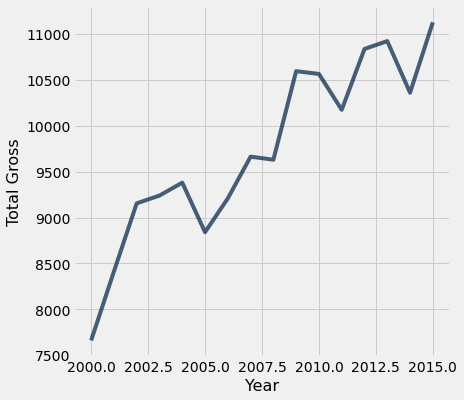

In [36]:
century_21.plot('Year', 'Total Gross')
#영화 매출액

관찰 결과

+ 2008년 대비 2009년 제작 편수는 급감, 금융 위기가 원인

+ 그러나 영화 매출액은 2009년 오히려 증가, 경제 불황시 오히려 고통을 잊기 위해 영화를 더 보는 경향

+ 또 다른 이유는 영화 아바타의 상영

In [37]:
century_21.where('#1 Movie', 'Avatar')

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


#### Bar Chart

In [38]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


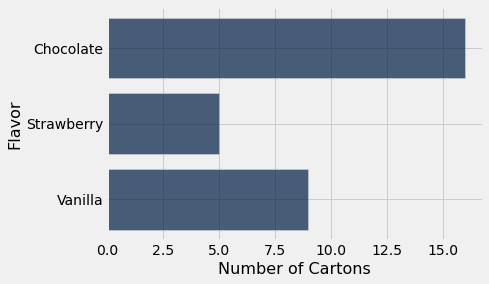

In [39]:
icecream.barh('Flavor', 'Number of Cartons')

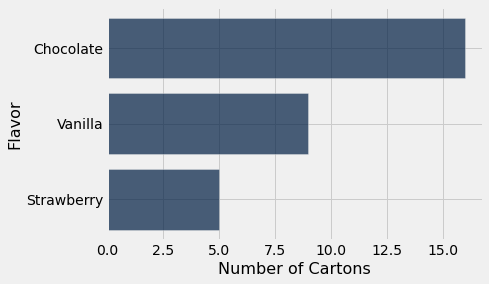

In [40]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

#### Grouping Categorical Data

In [41]:
top = Table.read_table(fpath+'top_movies.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [42]:
movies_and_studios=top.select('Title', 'Studio')
movies_and_studios.group('Studio')

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


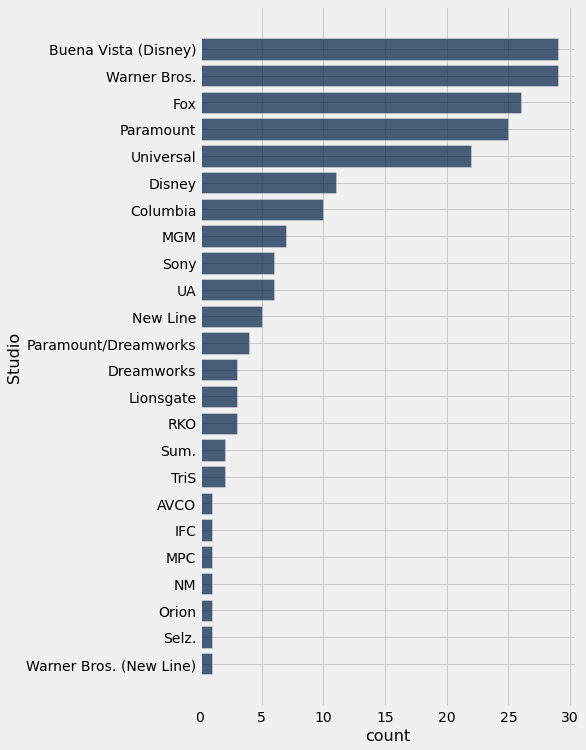

In [43]:
movies_and_studios.group('Studio').sort('count', descending=True).barh('Studio')

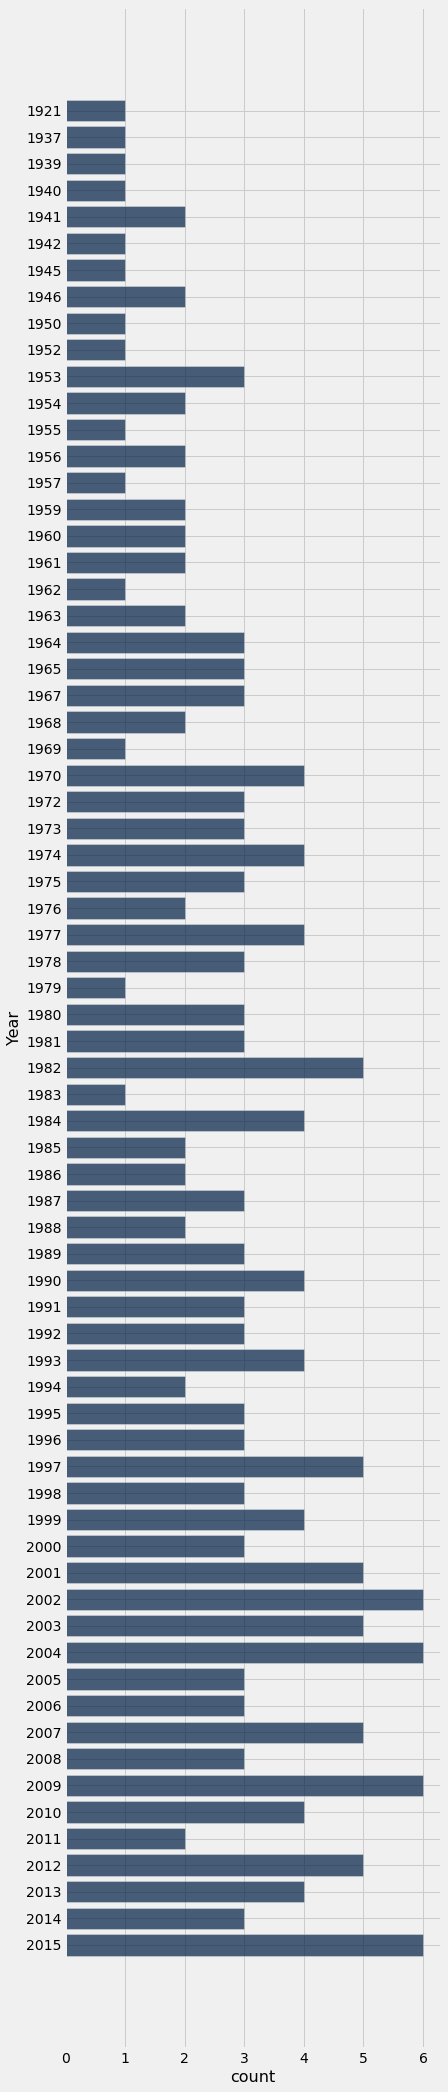

In [49]:
movies_and_years=top.select('Title', 'Year')
movies_and_years.group('Year').barh('Year') #Year을 numerical 변수로 본 분포

#### Histograms


In [44]:
top.set_format([2,3], NumberFormatter) #Adjusted Gross : 2016년 티켓 가격으로 환산된 수치

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [54]:
millions=top.select(0).with_column('Adjusted Gross', np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


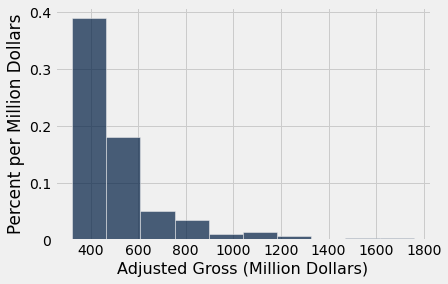

In [55]:
millions.hist('Adjusted Gross', unit='Million Dollars')

+ bin : grouping 한 범위 [a,b)
+ 맨 왼쪽 혹은 맨 오른쪽 bin은 적절하게 조정될 수 있다.
+ age=100은 100 이상을 의미

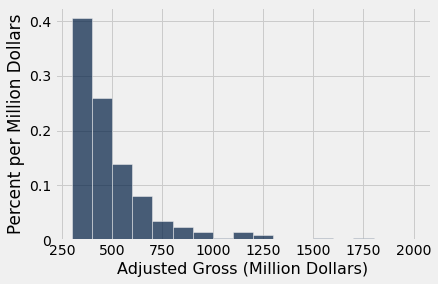

In [56]:
millions.hist('Adjusted Gross', bins=np.arange(300, 2001, 100), unit='Million Dollars')

In [59]:
bin_counts=millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show(5)

bin,Adjusted Gross count
300,81
400,52
500,28
600,16
700,7


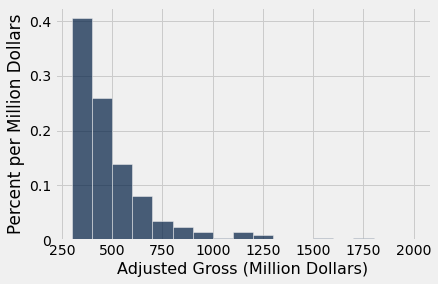

In [63]:
bin_counts.hist('Adjusted Gross count', bin_column='bin', unit='Million Dollars')

##### 수직 축 (Vertical Axis)
+ 각 bin의 높이는 다음과 같이 계산된다. height=percent/width
+ 이 때 percent는 전체 elemtns 중 해당 bin에 포함된 elements의 백분율
+ width는 해당 bin의 너비

In [66]:
counts=bin_counts.relabeled('Adjusted Gross count', 'Count')
percents=counts.with_column('Percent', (counts.column('Count')/np.sum(counts.column('Count')))*100)
heights=percents.with_column('Height', percents.column('Percent')/100) #width가 [300,400) 이므로 너비는 100
heights

bin,Count,Percent,Height
300,81,40.5,0.405
400,52,26,0.26
500,28,14,0.14
600,16,8,0.08
700,7,3.5,0.035
800,5,2.5,0.025
900,3,1.5,0.015
1000,1,0.5,0.005
1100,3,1.5,0.015
1200,2,1,0.01


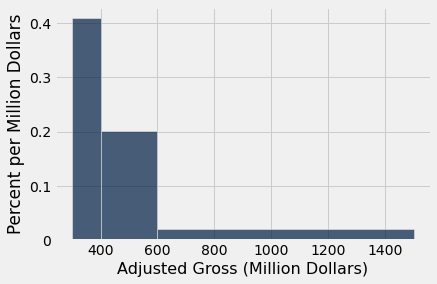

In [67]:
uneven=np.array([300, 400, 600, 1500])
millions.hist('Adjusted Gross', bins=uneven, unit='Million Dollars', density=True)

#### Overlaid Graphs

##### Scatter Plots

In [70]:
heights= Table.read_table(fpath+'galton.csv').where('childNum', 1).select('father', 'mother', 'childHeight')
heights

father,mother,childHeight
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,69.5
74,68,76.5
74,66.5,70.5
74.5,66,66
74,65.5,65.5


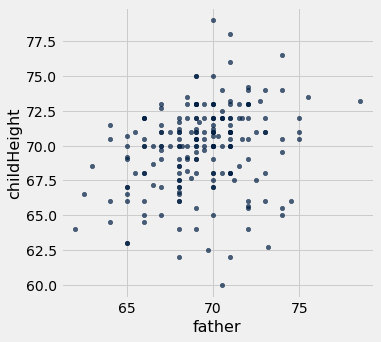

In [71]:
heights.scatter('father', 'childHeight')

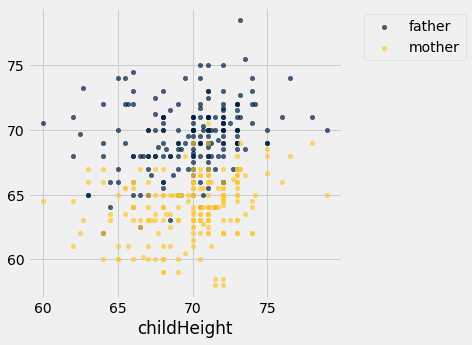

In [74]:
heights.scatter('childHeight') #자동 hue 설정

##### Line Graphs

In [85]:
full_census_table = Table.read_table(fpath+'nc-est2015-agesex-res.csv')
us_pop=full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014').relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014').where('AGE', are.below(19))
children=us_pop.where('SEX', 0).where('AGE', are.below(19)).drop('SEX')
children

AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


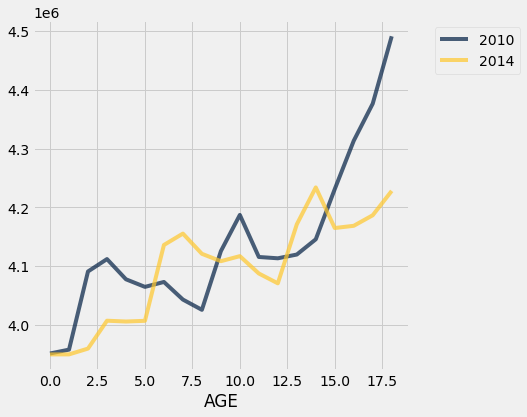

In [86]:
children.plot('AGE')

##### Bar Charts

In [88]:
usa_ca=Table.read_table(fpath+'usa_ca_2014.csv')
usa_ca

Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


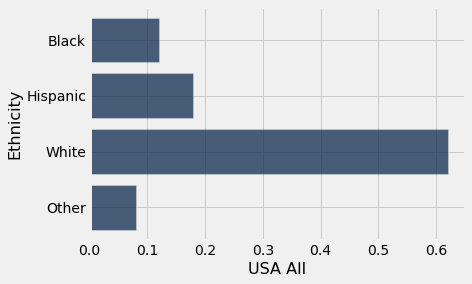

In [90]:
usa_ca.barh('Ethnicity', 'USA All')

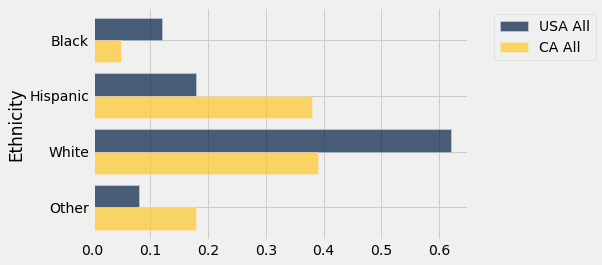

In [93]:
usa_ca.select('Ethnicity', 'USA All', 'CA All').barh('Ethnicity')